### CAPM $\beta$

Regression models a line that might look something like:

$$
y = c + \beta x + u.
$$

Recall that the CAPM equation states:

$$
R_{i,t} = R_{f,t} + \beta_i (R_{m,t} - R_{f,t})
$$

which we can re-arrange to form:

$$
R_{i,t} - R_{f,t} = \beta_i (R_{m,t} - R_{f,t}).
$$

Note the similarities between this equation and the equation for a straight line.  We can use linear regression to fit the re-arranged CAPM equation by writing $y=R_{i,t}-R_{f,t}$, $c=0$, and $x=R_{m,t}-R_{f,t}$.  The CAPM formula tells us that the *excess* return on the stock, $y$, is equal to the stock's $\beta$ times the market risk premium, $x$, on average.  There are random deviations from this average relationship between $x$ and $y$, and we model this with the error term $u$.

The CAPM equation is based on a theoretical relationship between a stock's excess return and the market risk premium.  Per the equation derived by the theory, there is no intercept (equivalently: the intercept is zero).

Below, we will simulate stock return data according to CAPM.  Thus, no intercept will be included in the simulated data.  After, we will run a regression in `statsmodels` (which will include an intercept term), and we will see that including an intercept in the regression is actually quite harmless.

Assume that the market return has an average annual return of $8\%$ and annual volatility of $10\%$, the risk free rate is constant at $0.03$, and let $\beta=1.2$.  Simulate one year of returns.

In [1]:
import numpy as np
np.random.seed(0)

annual_mean = .08
annual_vol = .1
annual_rf = .03

mean = (1+annual_mean)**(1/252) - 1
vol = annual_vol / np.sqrt(252)
rf = (1+annual_rf)**(1/252) - 1

mkt_ret = np.random.normal(mean, vol, 252)
mrp = mkt_ret - rf

beta = 1.2
stk_ret = rf + beta * mrp + np.random.normal(0, .005, 252)
excess_ret = stk_ret - rf

Plot the distribution of returns to see what daily returns for the stock look like.

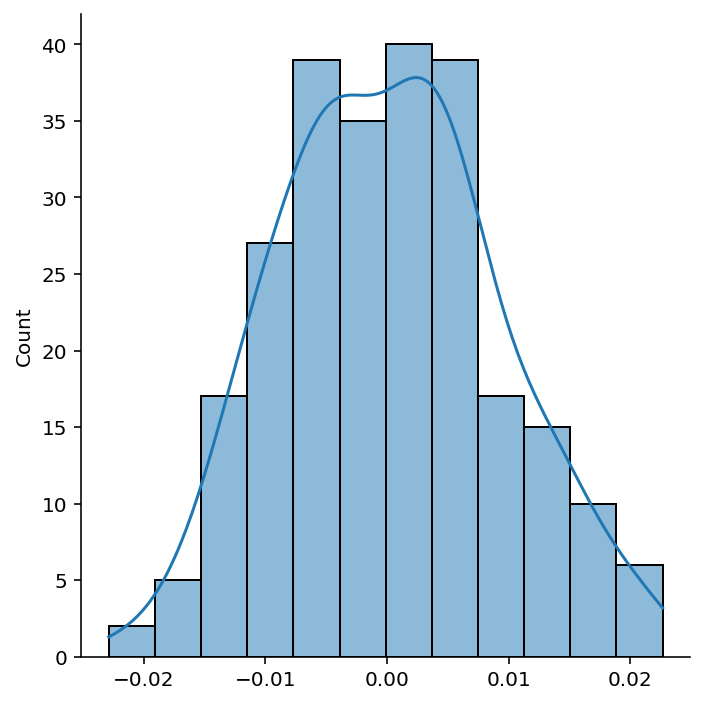

In [2]:
import seaborn as sns
sns.displot(stk_ret, kde=True)

By cumulating the return over the year, we can back out a stock price history for the simulated data.

<AxesSubplot:>

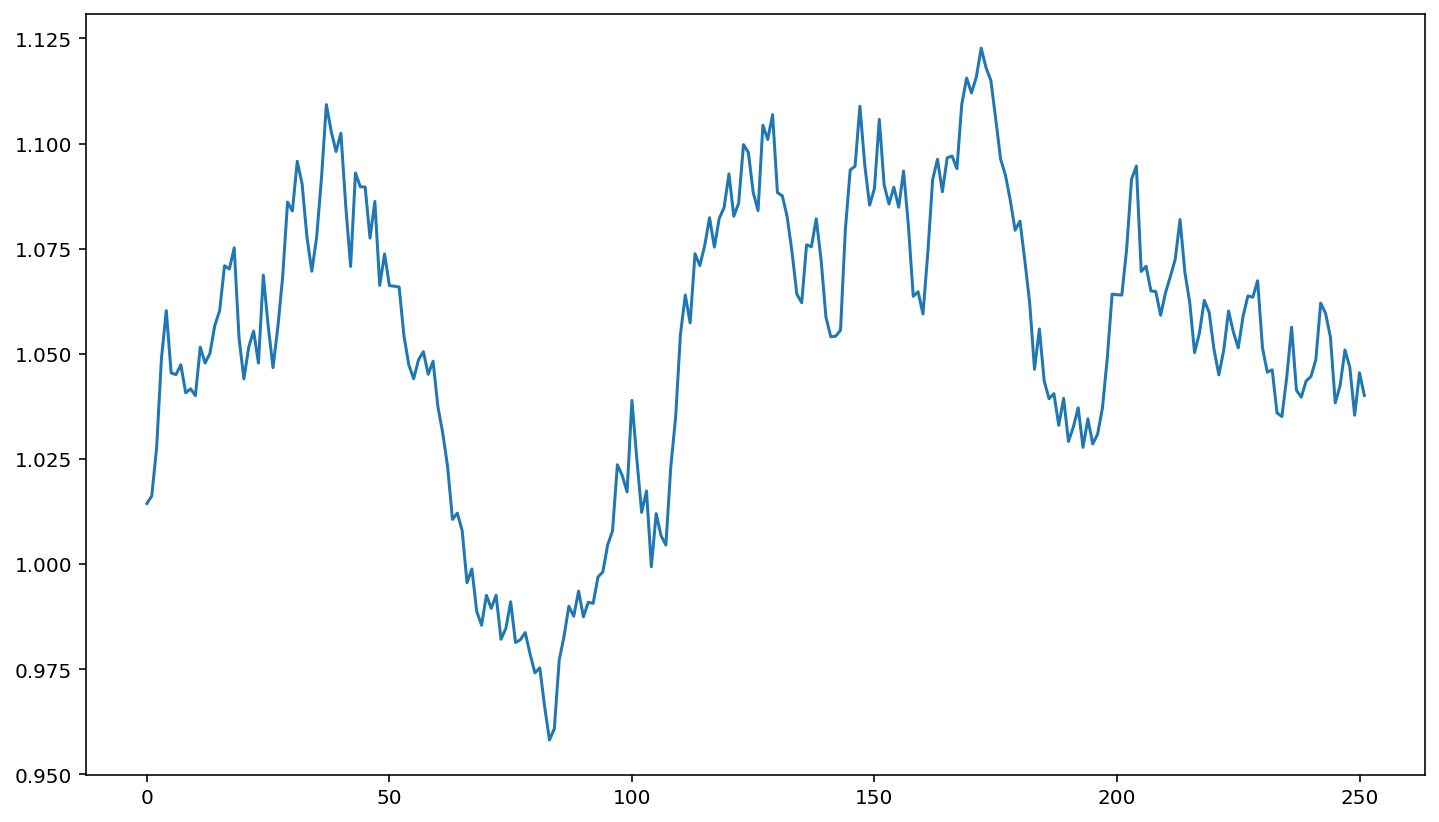

In [3]:
price = np.cumprod(1+stk_ret)
sns.lineplot(x=range(252), y=price)

To run regression on the data, we'll want to package the return series as a DataFrame.  The $y$ variable is the firm's excess return and the $x$ variable is the market risk premium.  So, store these two series as columns in a DataFrame.

In [4]:
import pandas as pd
df = pd.DataFrame({'excess_ret': excess_ret, 'mrp': mrp})
df.head()

,excess_ret,mrp
0,0.014271,0.011301
1,0.001654,0.002709
2,0.011082,0.006354
3,0.020639,0.014304
4,0.010715,0.011953


Run the regression via `statsmodels`.  By default, an intercept term is included, even though the CAPM equation hypothesizes that the intercept is equal to zero.

In [7]:
import statsmodels.formula.api as smf

mod = smf.ols(formula = 'excess_ret ~ mrp', data=df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             excess_ret   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     554.3
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           2.24e-65
Time:                        22:09:33   Log-Likelihood:                 978.92
No. Observations:                 252   AIC:                            -1954.
Df Residuals:                     250   BIC:                            -1947.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0004      0.000     -1.198      0.2

Because we simulated data with a zero-intercept, the regression estimates the intercept to be incredibly small.

In the `statsmodels.formula.api` syntax for regression, the trick to estimating a model without an intercept is to add `-1` as a term to the regression.  This tells `statsmodels` to remove the intercept term.

In [8]:
mod2 = smf.ols(formula = 'excess_ret ~ mrp - 1', data=df).fit()
print(mod2.summary())

                                 OLS Regression Results                                
Dep. Variable:             excess_ret   R-squared (uncentered):                   0.687
Model:                            OLS   Adj. R-squared (uncentered):              0.686
Method:                 Least Squares   F-statistic:                              551.9
Date:                Sun, 26 Sep 2021   Prob (F-statistic):                    2.54e-65
Time:                        22:11:09   Log-Likelihood:                          978.20
No. Observations:                 252   AIC:                                     -1954.
Df Residuals:                     251   BIC:                                     -1951.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The $\beta$ coefficient on the market risk premium is very close to what it was in the model that included an intercept.  It's best to always include an intercept in your regressions.  Worst case scenario, the model estimates that intercept to be approximately zero, which tells us that the intercept really isn't needed.  However, in many cases, the intercept is estimated to be non-zero.  The fact that CAPM does not include an intercept is due to the theoretical derivation of that model.  However, because this model is based on a *theory*, it may be wrong.